# Rainfall Prediction Project

 * Problem Statement : Rainfall prediction is a critical aspect of weather forecasting.
 * Why this problem :  Prediction has applicable in agriculture, disaster management, and water resource planning.
 * Solution : To predict whether Rainfall or Not based on various weather condition parameters using machine learning models.
 * Model Applying : Logistic Regression, XGBClassifier, SVC (Support Vector Classifier),DecisionTreeClassifier,RandomForestClassifier
 * Overall Conclusion for Logistic regression : The logistic regression model achieved an impressive overall accuracy of approximately Training Accuracy    88% & Validation Accuracy 89%. In summary, the logistic regression model demonstrates strong performance in Rainfall Prediction.
 * Overall Conclusion for XGBClassifier : XGBoost is overfitting on training but underperforms on validation.
   Training Accuracy : 100% & Validation Accuracy : 84%.
 * Overall Conclusion for DecisionTreeClassifier : DecisionTree is overfitting on training but underperforms on validation.
   Training Accuracy : 100% & Validation Accuracy : 71%.
 * Overall Conclusion for RandomForestClassifier : RandomForest is overfitting on training but underperforms on validation.
   Training Accuracy : 100% & Validation Accuracy : 87%.
 * Overall Conclusion for Support Vector Classifier : The Support Vector model achieved an impressive overall accuracy of approximately Training            Accuracy 90% & Validation Accuracy 88% In summary, the Support Vector model demonstrates strong performance. Giving best results training & Testing      score in Rainfall Prediction.
   
   *  **Final Conclusion : Support Vector Classifier is best machine learning model for Rainfall Prediction ** 

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

* Importing Data file

In [320]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


* check the size of the dataset. In the Dataset 366 rows & 12 columns

In [322]:
df.shape

(366, 12)

*  Checking which column of the dataset contains which type of data.
*  Rainfall is a target column all others have int & float datatype.


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


* To understand the mean median std div values in dataset

In [326]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


*  Check for missing or null values. winddirection & windspeed have 1 null value 

In [328]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

*  Filling missing values with median (alternative: mean)

In [330]:
df.fillna(df.median(numeric_only=True), inplace=True)

* Check for missing values, there is no missing values or null values

In [332]:
print(df.isnull().sum())

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    0
windspeed                 0
dtype: int64


* Displays the columns

In [334]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

* Here we can observe that there are unnecessary spaces in the names of the columns let's remove that from
  method to strip any leading or trailing whitespace from column names.

In [336]:
df.rename(str.strip,
          axis='columns', 
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

* Checking if the column contains any null values

In [338]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)
    
df.isnull().sum().sum()

0

# Exploratory Data Analysis
In this EDA we approach to analyzing the data using visual techniques. It is used to discover trends, 
and patterns or to check assumptions with the help of statistical summaries and graphical representations. 
Here we will see how to check the data imbalance and skewness of the data

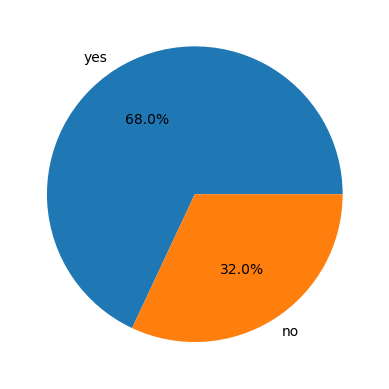

In [340]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

* Here we can clearly draw some observations:

* maxtemp is relatively lower on days of rainfall.
* dewpoint value is higher on days of rainfall.
* humidity is high on the days when rainfall is expected.
* Obviously, clouds must be there for rainfall.
* sunshine is also less on days of rainfall.
* windspeed is higher on days of rainfall.
* The observations we have drawn from the above dataset are very much similar to what is observed in real life as well.

In [342]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.642570,22.595582


* checking the distribution of the continuous features given in the dataset plotting distplot.
* for loop itterating & passing some parameters

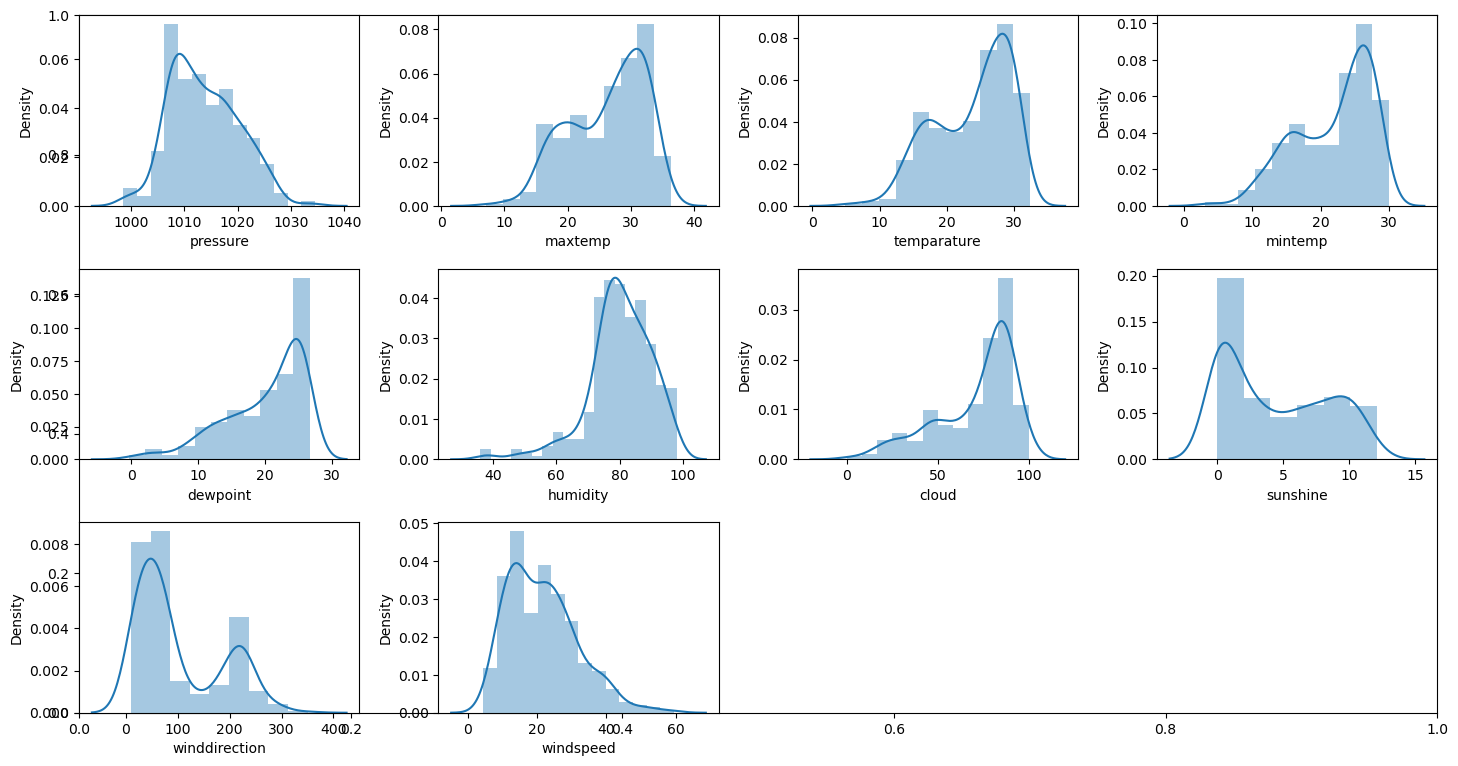

In [344]:
import seaborn as sns
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

* Outliers detection

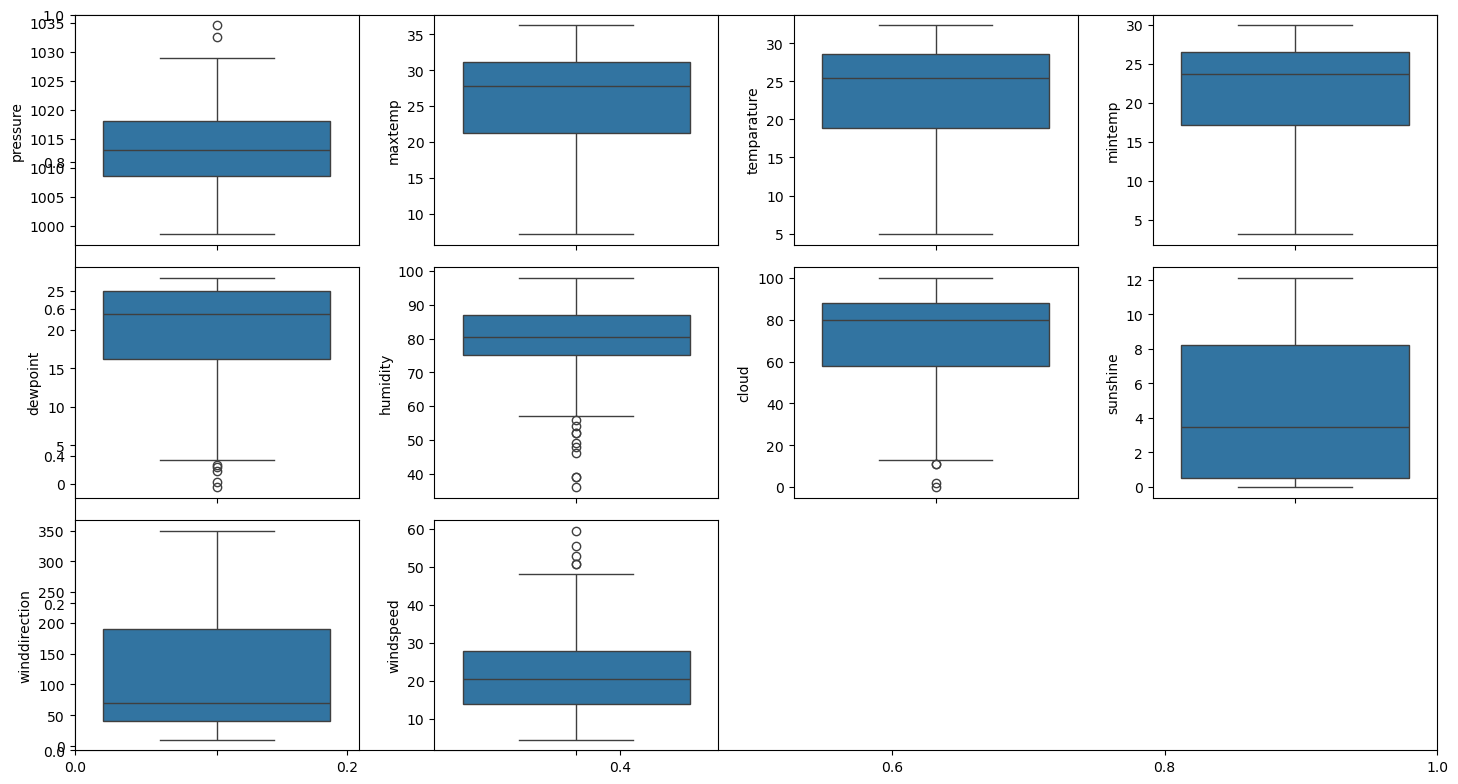

In [346]:
# Let's draw boxplots for the continuous variable to detect the outliers present in the data.
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()
# There are outliers in the data but sadly we do not have much data so, we cannot remove this.

In [347]:
df.replace({'yes':1, 'no':0}, inplace=True)

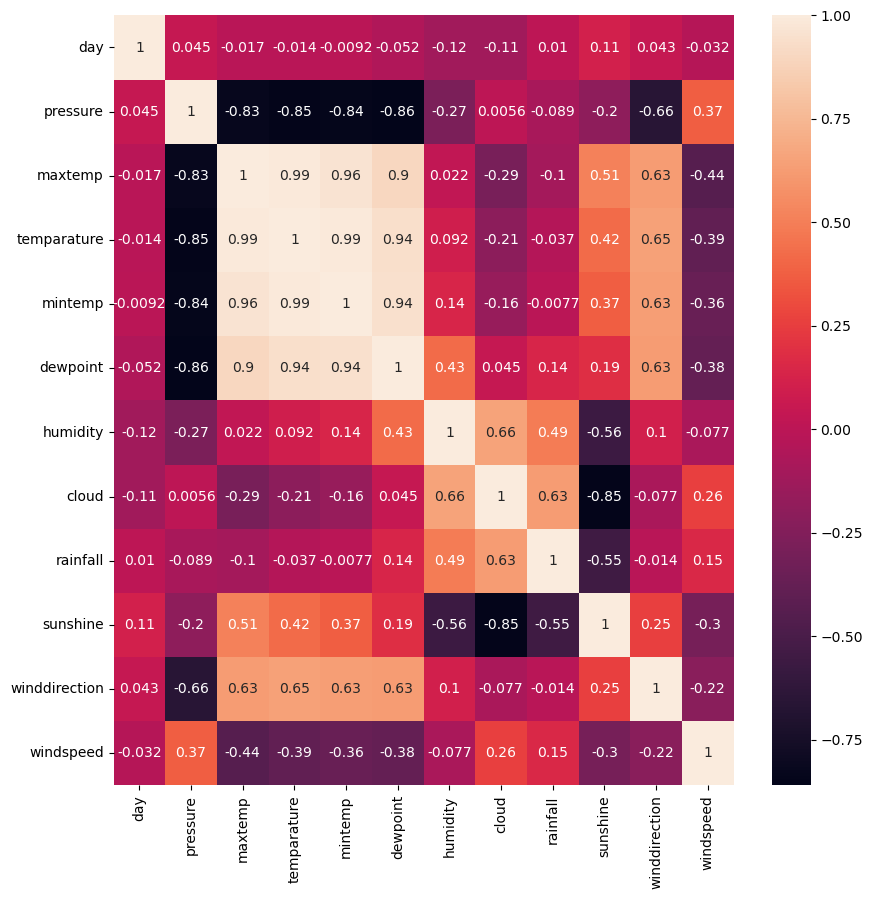

In [348]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Training
* we have to decided features & target

In [352]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

* As the data was highly imbalanced we will  balance it by adding repetitive rows of minority class.

In [354]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)


ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

* Normalizing the features using fit transform for stable and fast training.

In [356]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

* Aplying ML models for checking accuracy using for loop.
* The ratio of trainning & validation Accuracy is the best for Support Vector Classifier as classification tasks.

In [358]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = [LogisticRegression(),SVC(kernel='rbf', probability=True), XGBClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in range(5):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X) 
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val) 
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()
  ac=accuracy_score(Y_train,Y_train)
  cm=confusion_matrix(Y_train,Y_train)
  cr=classification_report(Y_train,Y_train)


  print(f"AC :   {ac}\nCM :\n {cm}\nCR : {cr}")

LogisticRegression() : 
Training Accuracy :  0.8906340748970986
Validation Accuracy :  0.8983333333333333

AC :   1.0
CM :
 [[ 93   0]
 [  0 199]]
CR :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       199

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

SVC(probability=True) : 
Training Accuracy :  0.902805484709982
Validation Accuracy :  0.8958333333333333

AC :   1.0
CM :
 [[ 93   0]
 [  0 199]]
CR :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       199

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

XGBClassifier(base_score=None, booster=Non